In [2]:
import cv2


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
%matplotlib inline

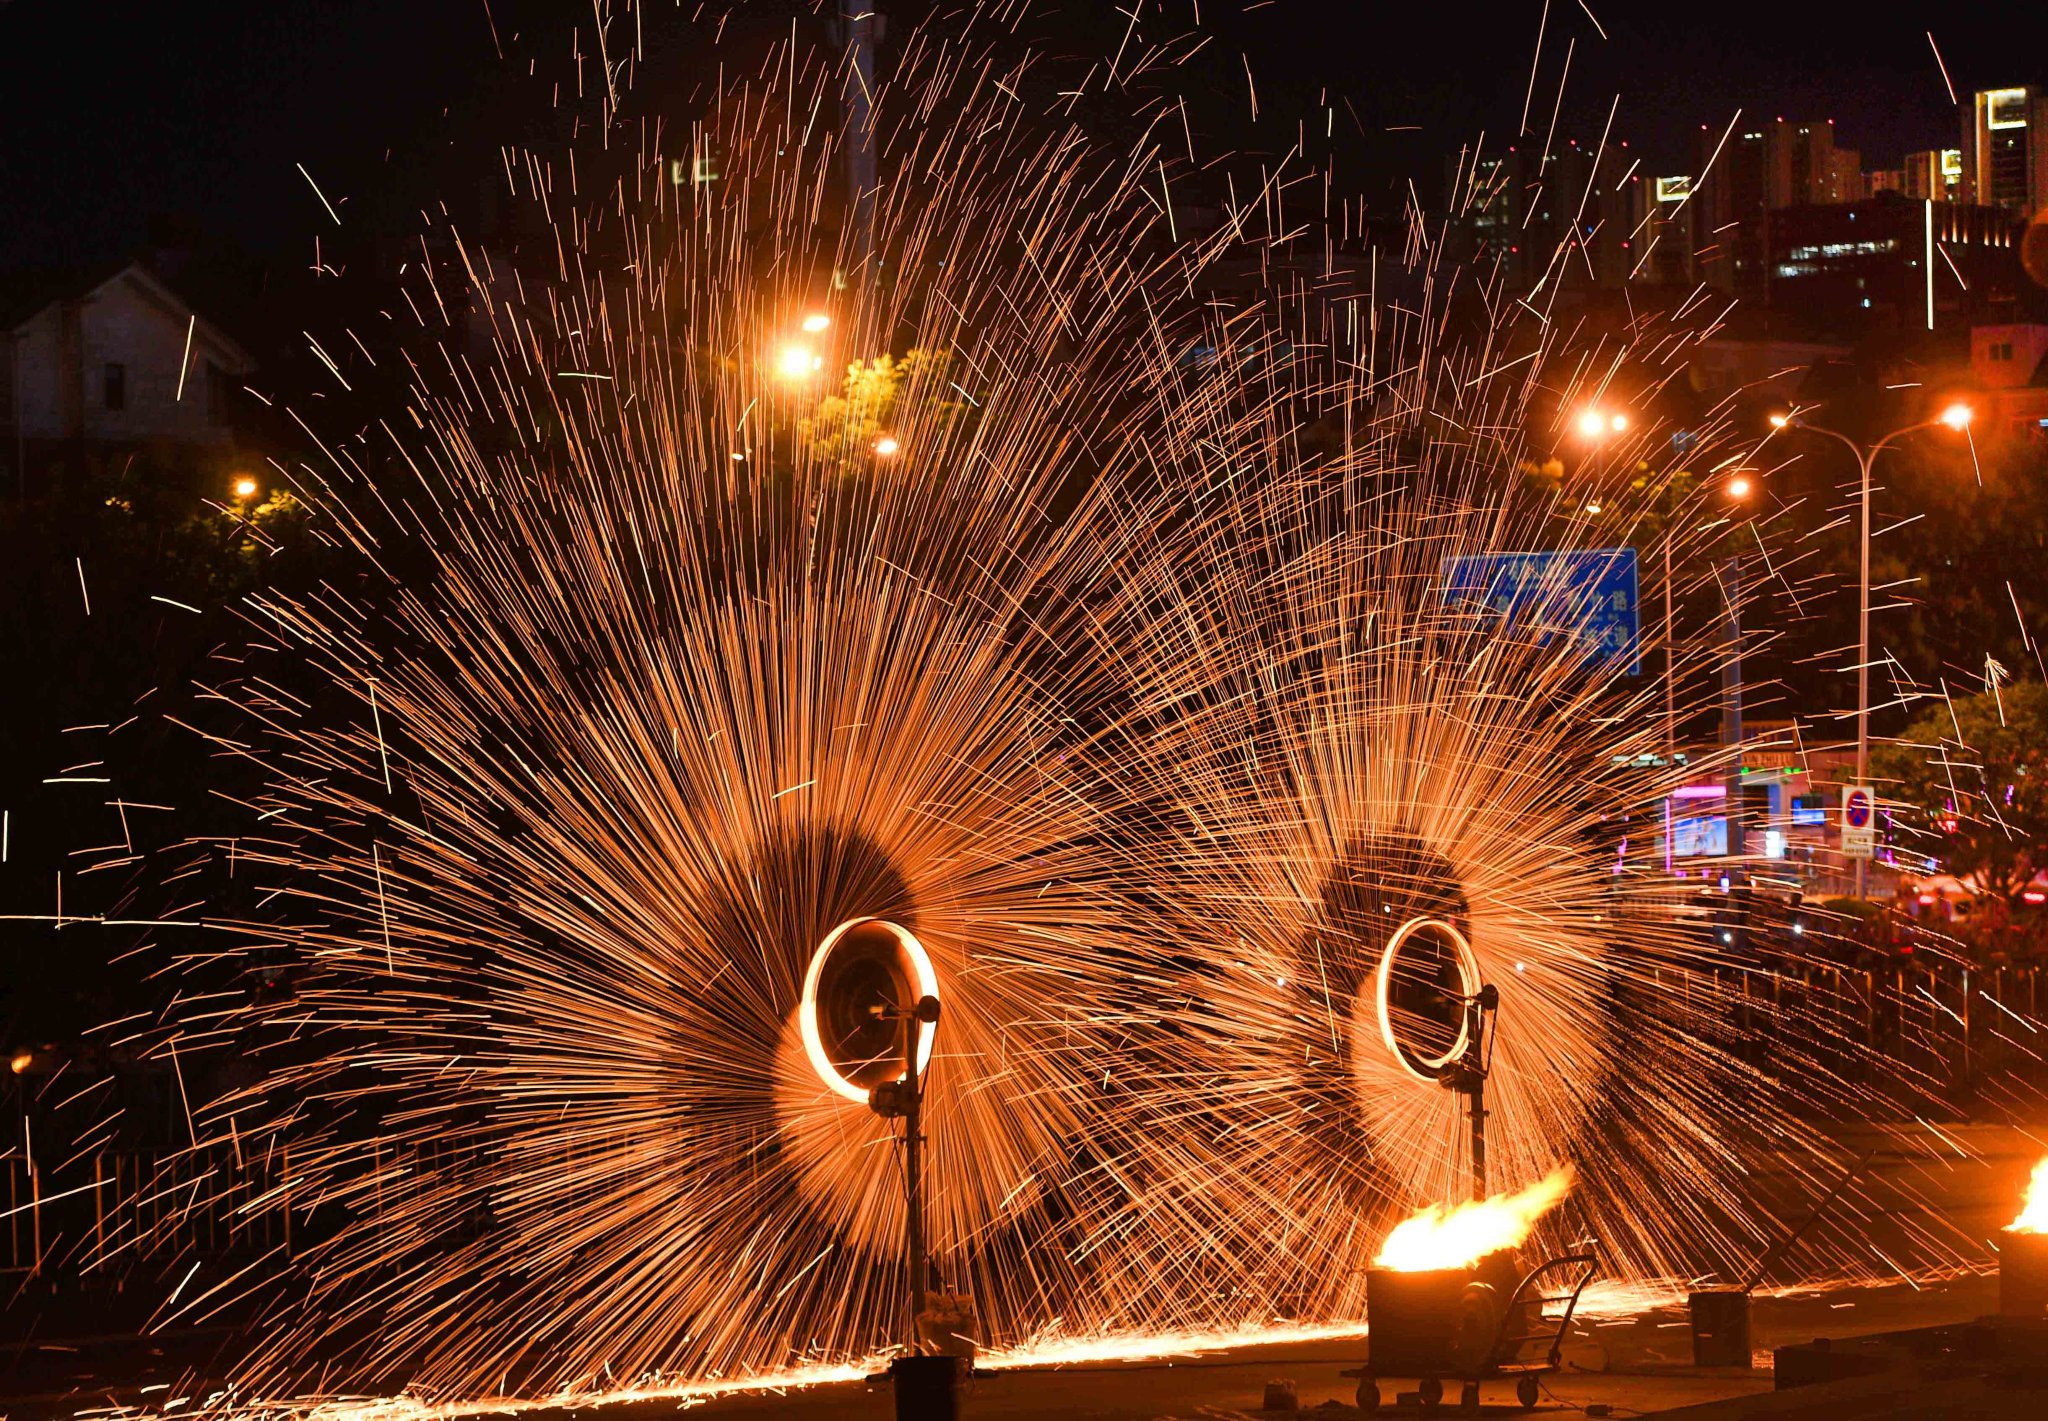

In [4]:
Image(filename='IMG_2777.JPG')
#Image class shows actual dimensions of image without resizing

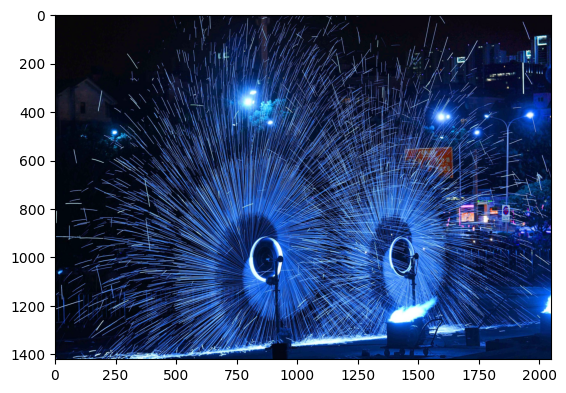

In [19]:
cv_img=cv2.imread('IMG_2777.JPG')
# 0: The flag 0 indicates that the image should be read in grayscale mode
plt.imshow(cv_img)

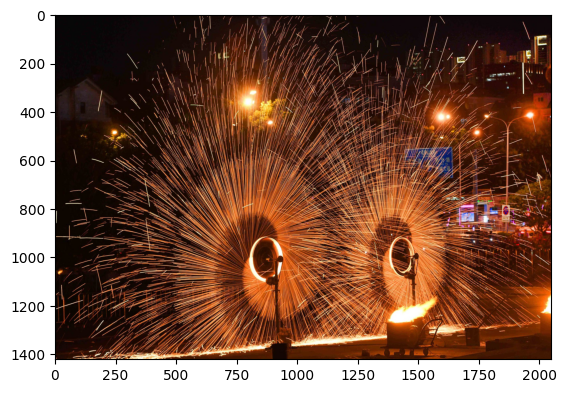

In [20]:
#you see cell above does not show the same colors
#this is because open cv stores images in BGR  format whereas matplotlib uses the normal RGB
#so to display image correctly change the read images channles to be in rgb form
cv_img=cv_img[:,:,::-1]#refers to all rows (:), all columns (:), and then slices the color channels in reverse order (::-1).
plt.imshow(cv_img)

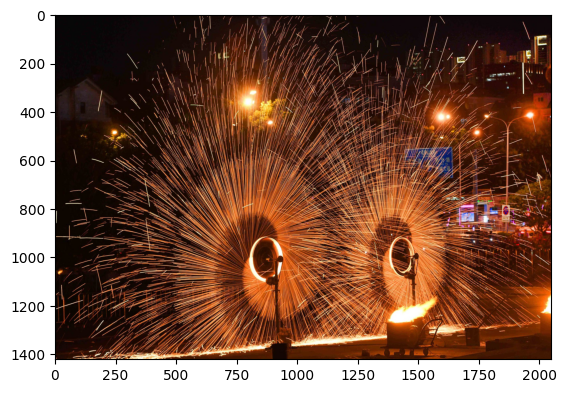

In [21]:
#you can split img into its channels using .split
b,g,r=cv2.split(cv_img)
#and you can merge them back using .merge

plt.imshow(cv2.merge((b,g,r)))

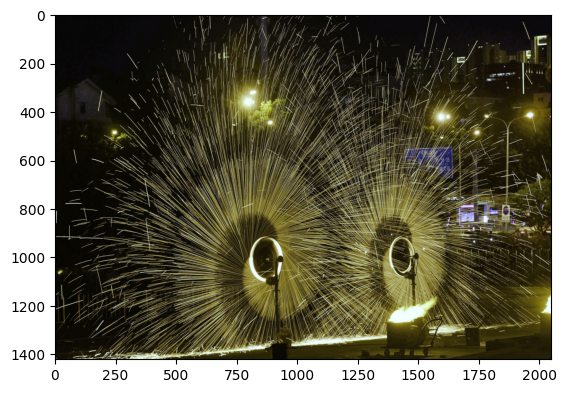

In [31]:
# .cvtColor
#to convert from one color form to another

plt.imshow(cv2.cvtColor(cv_img,cv2.COLOR_RGB2XYZ))

In [32]:
cv2.imwrite('new_img.jpg',cv_img)

True

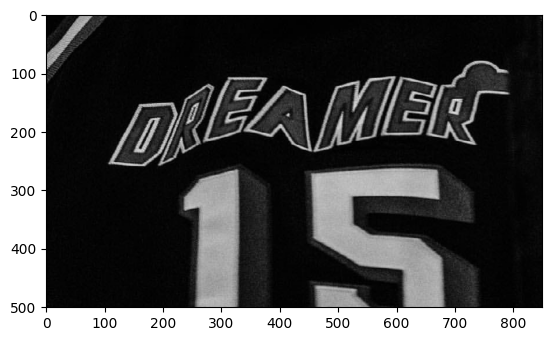

In [35]:
#cropping imgs
img=cv2.imread('IMG_2834.JPG')
#crop using slicing
plt.imshow(img[1199:1700,250:1100])

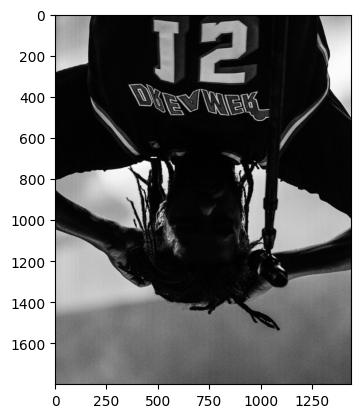

In [40]:
# flip img
#can specify1,0-1
plt.imshow(cv2.flip(img,0))

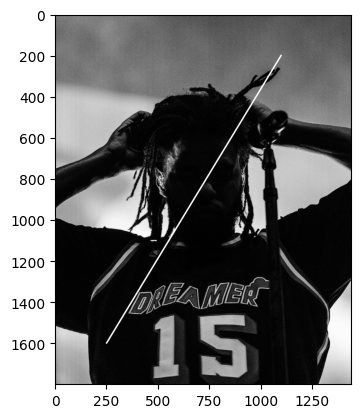

In [51]:
#img annotation
#line(img,start point,end point,color,thickness,linetype)
line=cv2.line(img,(250,1600),(1100,200),(255,255,255),thickness=1,lineType=1)
plt.imshow(line)

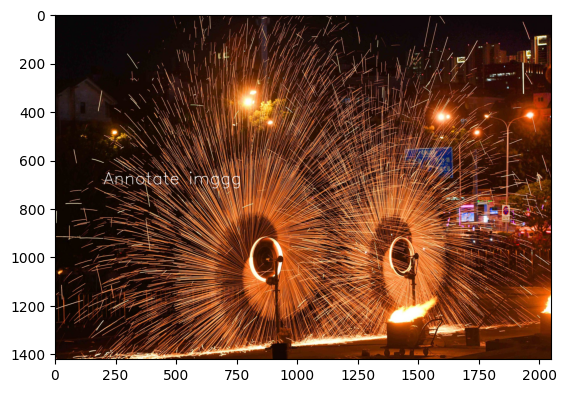

In [60]:
img = cv2.imread('IMG_2777.JPG')

img_copy = img.copy()
cv2.putText(img_copy, 'Annotate imggg', (200, 700), cv2.FONT_ITALIC, 2.3, (255, 255, 255), 2)
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

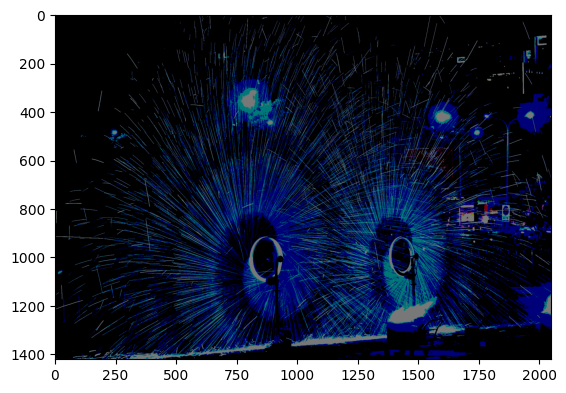

In [63]:
#thresholding: Thresholding is a simple and effective technique in image processing used to segment or separate objects from the background by converting a grayscale image into a binary image (black and white). The basic idea is to classify pixels in the image as either foreground (object) or background based on their intensity values.


# In thresholding, you define a threshold value, and for each pixel in the image:

# If the pixel value is greater than the threshold, it's set to one value (typically white).
# If the pixel value is less than or equal to the threshold, it's set to another value (typically black).

# retval, thresholded_image = cv2.threshold(src, thresh, maxval, type)
ret, thresh_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_img)

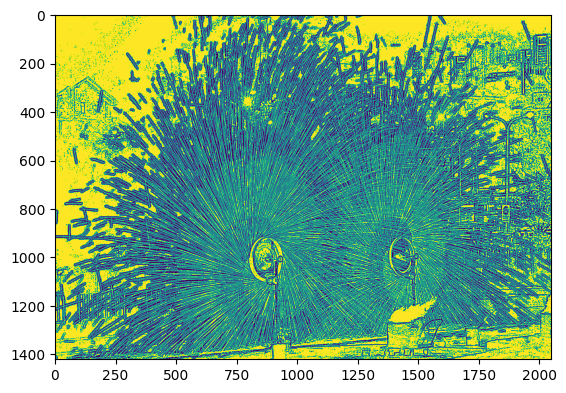

In [69]:
# Adaptive Thresholding: Instead of using a global threshold value, adaptive thresholding calculates the threshold for small regions of the image, which helps in handling varying lighting conditions.

# # thresholded_image = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)
# src: The source image (must be a grayscale image).
# maxValue: The value to set for pixels exceeding the calculated threshold value.
# adaptiveMethod: The method used to calculate the threshold for small regions:
# cv2.ADAPTIVE_THRESH_MEAN_C: The threshold is the mean of the neighborhood area minus C.
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold is a weighted sum (Gaussian window) of the neighborhood values minus C.
# thresholdType: Type of thresholding to apply (usually cv2.THRESH_BINARY or cv2.THRESH_BINARY_INV).
# blockSize: The size of the neighborhood area (must be odd, e.g., 3, 5, 7).
# C: A constant subtracted from the computed mean or weighted sum.
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thres_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)
plt.imshow(thres_img)

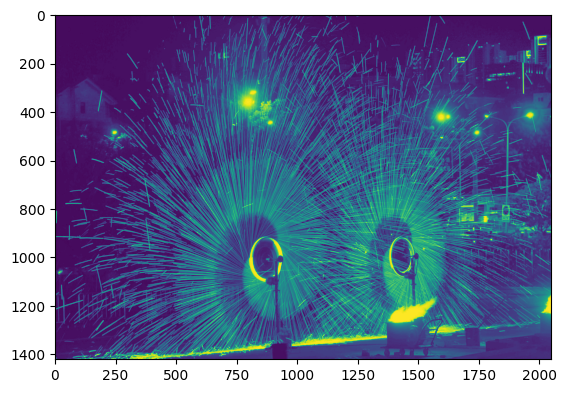

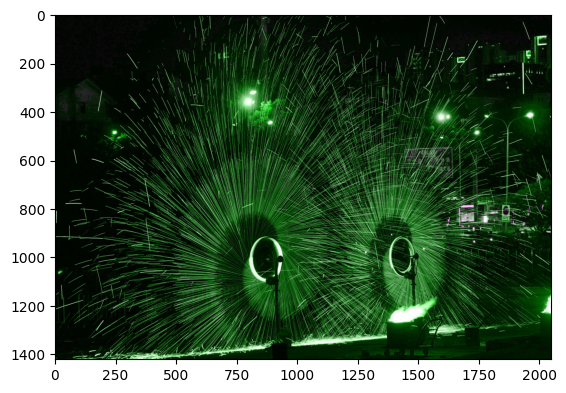

In [70]:
#bitwise operations
#bitwise operations allow you to manipulate images at the pixel level.
# Bitwise AND (cv2.bitwise_and): Performs a pixel-wise AND operation between two images. The result is 1 only if both corresponding pixels are 1. This is often used to extract a specific region of interest in an image.
result = cv2.bitwise_and(img,cv_img)


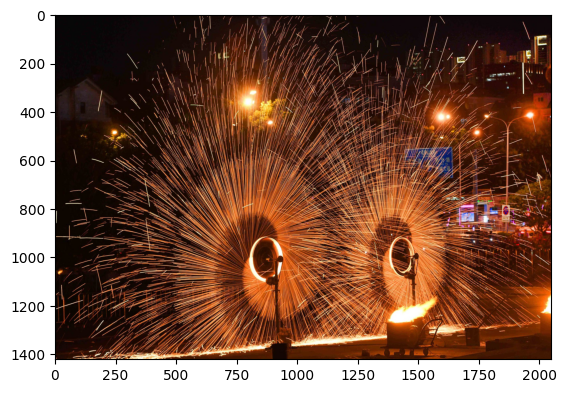

In [74]:
# Bitwise OR (cv2.bitwise_or): Performs a pixel-wise OR operation. The result is 1 if either of the corresponding pixels is 1. This is used to combine two images together.
# result = cv2.bitwise_or(img1, img2)


In [75]:
#accessing camera
import sys

In [77]:
#using webcam to view stuff

# s = 0: This initializes the variable s to 0. By default, 0 tells OpenCV to capture video from the default camera (typically your laptop's webcam).

# if len(sys.argv) > 1:: This checks if more than one command-line argument is provided when running the Python script. The first argument, sys.argv[0], is the name of the script itself, and any additional arguments (sys.argv[1], sys.argv[2], etc.) are user-specified inputs.


s=0
if len(sys.argv)>1 and not sys.argv[1].startswith('--'):
    s=sys.argv[1]
# s = sys.argv[1]: If an additional command-line argument is passed (i.e., len(sys.argv) > 1), it assigns the first argument (sys.argv[1]) to the variable s. This argument could be a file path to a video file (e.g., "video.mp4") or a video stream URL.

source=cv2.VideoCapture(s)
# source = cv2.VideoCapture(s): This creates a VideoCapture object using OpenCV to capture video from the specified source s.

# If s is 0, it will capture video from the default webcam.
# If s is a file path (e.g., "video.mp4"), it will open that video file.
# If s is a URL (e.g., "http://example.com/stream"), it will try to capture a video stream.

window_name='camera preview'
cv2.namedWindow(window_name,cv2.WINDOW_NORMAL)
# cv2.namedWindow(): This creates a window in OpenCV where images or video frames can be shown. The first parameter is the window's name (a string), which is used later when you call imshow().

# cv2.WINDOW_NORMAL: This flag allows you to resize the window manually (it makes the window resizable). Without this flag, the window would be a fixed size based on the content you show.
while cv2.waitKey(1)!=27:
#press esc to exit window
#     cv2.waitKey(1): This function waits for a key press for a specific amount of time (in milliseconds). The argument 1 means it waits for 1 millisecond before checking for a key press. If no key is pressed, it returns -1.

# The loop checks if cv2.waitKey(1) is equal to 27 (the ASCII code for ESC). If you press ESC, the loop ends.
    has_frame,frame=source.read()
# source.read(): This method captures the next frame from the video source (which could be a webcam or video file). It returns two values:
# has_frame: A boolean value that indicates whether the frame was successfully captured. If it returns False, it means there are no more frames (like at the end of a video file).
# frame: The actual image (a single frame from the video).
    if not has_frame:
        break
    cv2.imshow(window_name,frame)
    # displays the captured frame in the window. The first parameter is the window's name (which you defined earlier), and the second is the image or frame (the frame variable).
source.release()
cv2.destroyWindow(window_name)

: 

In [4]:
#displaying actual videos
source='/Users/samuel/Downloads/Queen.of.Tears.E14.(NKIRI.COM).mkv'
cap=cv2.VideoCapture(source)

if not cap.isOpened():
    print('error viewing video')



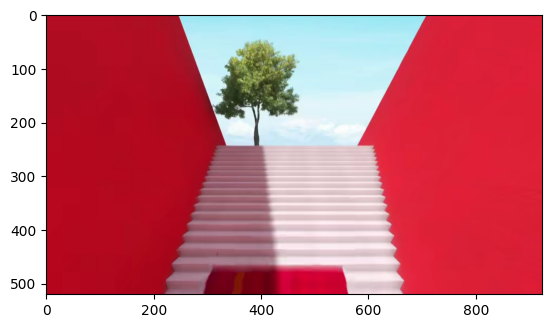

In [12]:
#show first frame of video ie an img
ret,frame=cap.read()
plt.imshow(frame[:,:,::-1])

In [29]:
from IPython.display import HTML
HTML("""
<video width=1024 controls>
    <source src="4. Implicit Animation Example 1 Coding Animated Color Pallete.mp4" type="video/mp4">
    Your browser does not support the video tag.
</video>
""")


In [30]:
#using video writer
#VideoWriter in OpenCV allows you to save a sequence of frames (such as those captured from a camera or generated by your code) into a video file. Here’s a step-by-step guide to help you understand how to use cv2.VideoWriter:

# Basic Steps to Use cv2.VideoWriter:
# Initialize VideoWriter: You first need to set up a cv2.VideoWriter object, which will handle saving the video to a file.
# Capture Frames: You can capture frames from a video stream (e.g., from a webcam) or generate them.
# Write Frames: Write the frames to the file using VideoWriter.write().
# Release: Once you're done, release the video writer to free the resources.

# cv2.VideoWriter(filename, fourcc, fps, frameSize[, isColor])
# # fourcc: FOURCC code is a sequence of four characters like 'XVID', 'MJPG', or 'H264' that represent a specific video compression algorithm.
# The codec is responsible for encoding (compressing) and decoding (decompressing) the video frames.
# Common FOURCC Codes:
# XVID: A widely-used codec, especially for creating AVI files. It’s efficient for high-quality video.
# MJPG: Motion JPEG. Each frame is compressed as a JPEG image. It’s faster to encode but results in larger file sizes compared to XVID.
# H264: One of the most efficient and widely used codecs, providing high-quality video at lower bitrates. Typically used in MP4 files.
# eg. fourcc = cv2.VideoWriter_fourcc(*'XVID')  # For XVID codec
# fourcc = cv2.VideoWriter_fourcc(*'MJPG')  # For Motion JPEG
 
# fps: Frames per second (the frame rate of the video).
# frameSize: Size of the video frames (e.g., (640, 480)).
# isColor: If the video is in color (True) or grayscale (False).


In [40]:
import cv2

# Capture video from the default webcam
cap = cv2.VideoCapture(0)

# Check if the webcam opened successfully
if not cap.isOpened():
    print("Error: Could not access the webcam.")
    exit()

# Set up the VideoWriter to save the video (ensure the frame size is correct)
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (640, 480))

while True:
    # Capture frame-by-frame from webcam
    ret, frame = cap.read()

    if not ret:
        print('Could not capture frame.')
        break

    # Resize the frame to ensure it's 640x480 if needed (depends on your webcam resolution)
    frame_resized = cv2.resize(frame, (640, 480))

    # Write the resized frame into the output file
    out.write(frame_resized)

    # Display the frame in a window
    cv2.imshow('Webcam Frame', frame_resized)

    # Stop the process if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when the job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [38]:
#writing video from another video
# Capture video from the file
cap = cv2.VideoCapture('/Users/samuel/Udemy - The Ultimate Dart & Flutter Course 2024 2024-1/23. Flutter Automated Testing/1. Introduction To Testing.mp4')

# Check if the video capture opened successfully
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Set up the VideoWriter after confirming video capture
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('outp.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        print('could not capture frame')
        break

    # Write the frame into the output file
    out.write(frame)

    # Display the frame in a window (optional)
    cv2.imshow('frame', frame)

    # Stop the process if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release everything when the job is finished
cap.release()
out.release()
cv2.destroyAllWindows()


OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [41]:
#IMAGE FILTERING AND EDGE DETECTION
import numpy as np

# Filter Modes
PREVIEW = 0    # No filter, just preview
BLUR = 1       # Blur filter
FEATURES = 2   # Corner feature detection
CANNY = 3      # Canny Edge Detector
# PREVIEW: This mode is used to display the video feed without applying any filters.
# BLUR: In this mode, a blur filter will be applied to the video feed.
# FEATURES: This mode applies corner feature detection, which identifies key points (corners) in the image.
# CANNY: This is the mode for Canny Edge Detection, which highlights edges in the image.

# Parameters for corner feature detection
feature_params = dict(maxCorners=500,
                      qualityLevel=0.2,
                      minDistance=15,
                      blockSize=9)
# maxCorners=500: This limits the number of corners/features to be detected. The algorithm will detect at most 500 corners in the image.
# qualityLevel=0.2: This determines the minimum accepted quality of corners. A higher value means fewer corners will be detected, but they will be more distinct. A lower value results in detecting more corners, but some may be less prominent.
# minDistance=15: This ensures that detected corners are at least 15 pixels apart, preventing the algorithm from detecting multiple closely-packed corners.
# blockSize=9: This parameter defines the size of the block used for corner detection. A larger block size means the algorithm will analyze a larger neighborhood around each pixel when detecting corners.

# Set default image filter to PREVIEW mode
image_filter = PREVIEW

# Open a camera or video file
source = cv2.VideoCapture(0)  # 0 for the default camera

if not source.isOpened():
    print("Error: Cannot open the camera.")
    exit()


win_name = "Camera Filters"
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

# Main loop to capture frames and apply filters
while True:
    ret, frame = source.read()  # Capture frame from the camera
    if not ret:
        print("Error: Unable to read frame.")
        break

    # Apply the selected filter based on user input
    if image_filter == PREVIEW:
        result = frame  # No filter applied, just preview
    elif image_filter == CANNY:
        # Convert the frame to grayscale first
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Apply Canny edge detection
        result = cv2.Canny(gray_frame, 80, 150)
        # The function takes two threshold values: 80 (lower) and 150 (upper). Edges with gradients higher than the upper threshold are considered "strong edges," while those between the thresholds are "weak edges." This helps eliminate noise and enhance strong edges.
    elif image_filter == BLUR:
        # Apply a Gaussian blur
        result = cv2.blur(frame, (13, 13))
        # cv2.blur() applies a Gaussian blur, which smooths the image, reducing noise. The (13, 13) tuple specifies the kernel size, meaning a 13x13 pixel neighborhood is used for the blur calculation.
    elif image_filter == FEATURES:
        # Convert frame to grayscale
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Detect corners/features in the frame
        corners = cv2.goodFeaturesToTrack(frame_gray, mask=None, **feature_params)
        # The ** operator in Python is used for unpacking a dictionary into keyword arguments. 
        # When you use **feature_params inside the function call, it "unpacks" the dictionary so that each key-value pair is passed as a separate named argument to the cv2.goodFeaturesToTrack() function.
        #eg.
        #  corners = cv2.goodFeaturesToTrack(frame_gray, maxCorners=500, qualityLevel=0.2, minDistance=15, blockSize=9)

        result = frame.copy()
        # If corners are detected, mark them on the frame
        if corners is not None:
            for x, y in np.float32(corners).reshape(-1, 2):
                cv2.circle(result, (int(x), int(y)), 10, (0, 255, 0), 1)

    # Show the resulting frame in the window
    cv2.imshow(win_name, result)

    # Wait for user input and process the filter selection
    key = cv2.waitKey(1)  # Capture keyboard input every 1 millisecond
    if key == ord('q') or key == ord('Q') or key == 27:  # Exit on 'q' or 'Esc'
        break
    elif key == ord('c') or key == ord('C'):  # Switch to Canny Edge Detection
        image_filter = CANNY
    elif key == ord('b') or key == ord('B'):  # Switch to Blur filter
        image_filter = BLUR
    elif key == ord('f') or key == ord('F'):  # Switch to Corner feature detection
        image_filter = FEATURES
    elif key == ord('p') or key == ord('P'):  # Switch back to Preview mode
        image_filter = PREVIEW

# Clean up
source.release()
cv2.destroyAllWindows()


In [1]:
#object localization
from IPython.display import HTML
HTML("""
<video width=1024 controls>
    <source src="/Users/samuel/realtime_obj_detection/race_car.mp4" type="video/mp4">
    Your browser does not support the video tag.
</video>
""")




tar: Removing leading '/' from member names
x .
x goturn.prototxt


Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


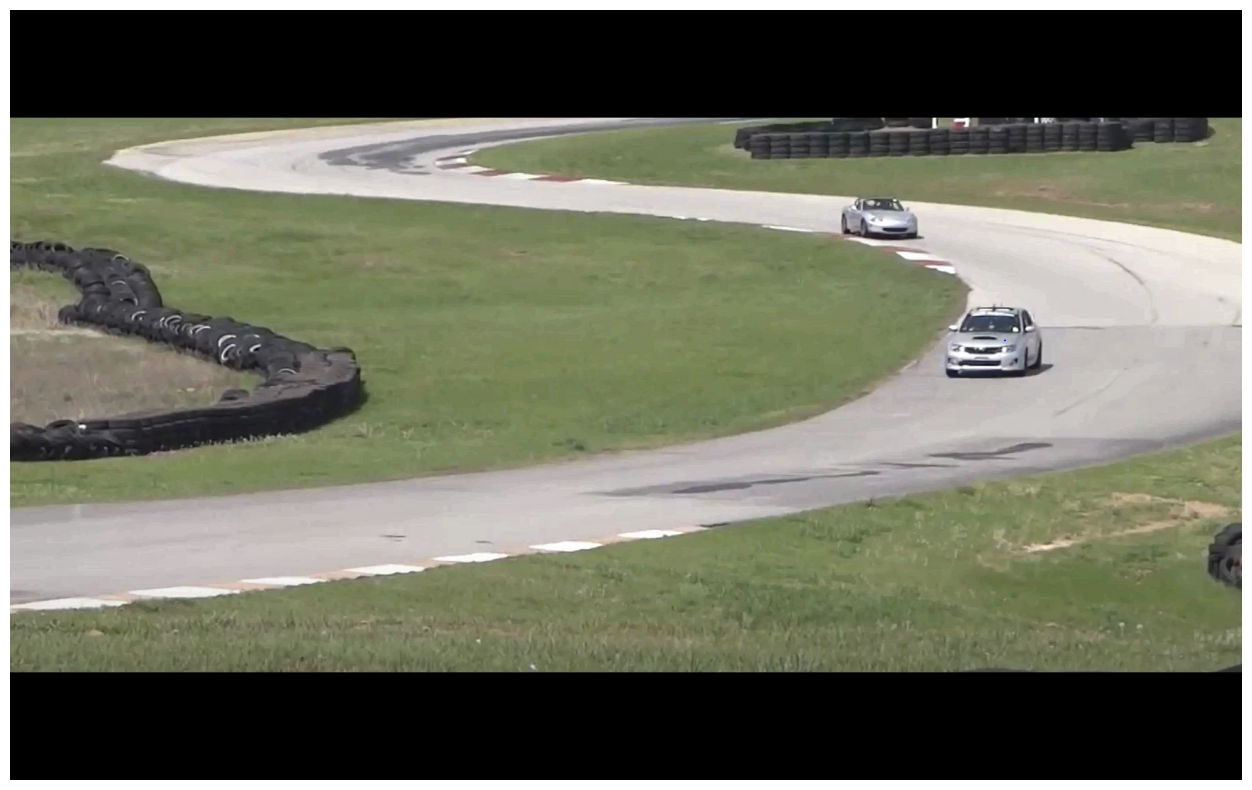

error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/video/src/tracking/detail/tracking_feature.cpp:128: error: (-215:Assertion failed) !patchSize.empty() in function 'generateRandomFeature'


In [12]:
# Import modules
import cv2
import sys
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import urllib

video_input_file_name = "/Users/samuel/realtime_obj_detection/race_car.mp4"

def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)

def displayRectangle(frame, bbox):
    plt.figure(figsize=(20, 10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB)  # Corrected from cv2.COLOR_RGB2BGR
    plt.imshow(frameCopy)
    plt.axis('off')
    plt.show()  # Added show to display the plot

def drawText(frame, txt, location, color=(50, 170, 50)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

# Download GOTURN model if not present
if not os.path.isfile('goturn.prototxt') or not os.path.isfile('goturn.caffemodel'):
    print("Downloading GOTURN model zip file")
    urllib.request.urlretrieve('https://www.dropbox.com/sh/77frbrkmf9ojfm6/AACgY7-wSfj-LIyYcOgUSZ0Ua?dl=1', 'GOTURN.zip')

    # Uncompress the file
    os.system('tar -xvf GOTURN.zip')  # Replaced !tar with os.system for shell command

    # Delete the zip file
    os.remove('GOTURN.zip')

tracker_types = ['MIL', 'GOTURN',]

# Change the index to change the tracker type
tracker_type = tracker_types[0]  # KCF

if tracker_type == 'MIL':
    tracker = cv2.TrackerMIL_create()
    
elif tracker_type == 'GOTURN':
    tracker = cv2.TrackerGOTURN_create()
video = cv2.VideoCapture(video_input_file_name)

# Check if the video opened successfully
if not video.isOpened():
    print("Error: Could not open video.")
    sys.exit()

# Read the first frame
ok, frame = video.read()
if not ok:
    print("Error: Could not read video file.")
    sys.exit()

# Get video properties
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Set up output video writer
video_output_file_name = f'race_car-{tracker_type}.mp4'
video_out = cv2.VideoWriter(video_output_file_name, cv2.VideoWriter_fourcc(*'avc1'), 10, (width, height))

# Define a bounding box
bbox = (1300, 405, 160, 120)

# Display the rectangle on the first frame
displayRectangle(frame, bbox)

# Initialize the tracker with the first frame and the bounding box
ok = tracker.init(frame, bbox)

while True:
    # Read the next frame
    ok, frame = video.read()
    if not ok:
        break

    # Start timer
    timer = cv2.getTickCount()

    # Update the tracker
    ok, bbox = tracker.update(frame)

    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

    # Draw the bounding box if tracking is successful
    if ok:
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (0, 255, 0), 2, 1)
    else:
        drawText(frame, 'Tracking failure detected', (80, 140), (0, 0, 255))

    # Display tracking information
    drawText(frame, "Tracker: " + tracker_type, (80, 60))
    drawText(frame, "FPS: " + str(int(fps)), (80, 100))

    # Write the frame to the output video
    video_out.write(frame)

    # Display the frame
    cv2.imshow('Tracking', frame)

    # Exit if the user presses 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
video.release()
video_out.release()
cv2.destroyAllWindows()


In [7]:
cv2.__version__

'4.10.0'